# Data Analysis Tools Cheatsheet
## Table of contents:
* [Conda](#conda)
* [Jupyter](#jupyter)
* [Pandas](#pandas)
    * [Reading a File](#readfile)
    * [Dataframe Summary](#summary)
    * [Columns Selection](#selection)
    * [Cleaning](#cleaning)
    * [Plots](#plots)
    * [Group data operations](#groupop)
* [Matplotlib](#matplotlib)

## Conda <a class="anchor" id="conda"></a>

Creating and removing virtual environments with conda

In [ ]:
conda create -n env_name python=3.6 pandas numpy
conda env remove -n env_name

Create 

In [ ]:
conda create -n py3 python=3

Activating environment

In [ ]:
source activate my_env

Exporting environment to share it with teammates 

In [ ]:
conda env export > environment.yaml

Create environment from yaml file

In [ ]:
conda env create -f environment.yaml

## Jupyter <a class="anchor" id="jupyter"></a>

Install Notebook Conda to help manage the environments in Jupyter

In [ ]:
conda install nb_conda

Create slides in Jupyter and launch (in Slides mode):

In [ ]:
jupyter nbconvert notebook.ipynb --to slides --post serve

## Numpy 

Note on scalar in **numpy**: they are different from the scalars in basic Python: instead of just int, we also have types like `uint8`, `int8`, `uint16`, `int16`. It can be specified when creating a numpy array, but all the items in the array must be of the same type!

Tensor example in numpy (3x3x2x1 tensor): 

In [3]:
import numpy as np
t = np.array([[[[1],[2]],[[3],[4]],[[5],[6]]],[[[7],[8]],\
    [[9],[10]],[[11],[12]]],[[[13],[14]],[[15],[16]],[[17],[17]]]])
t.shape

(3, 3, 2, 1)

For matrix-matrix multiplication in numpy: 
- left matrix should be arranged as rows  
- right matrix should be arranged as columns

**Important note** on matrix multiplication: 
- for 2D matrices np.dot and np.matmul provide the same results 
- for matrices with more than two dimension np.matmul and np.dot give different results!!!

## Pandas <a class="anchor" id="pandas"></a>

### Reading a file <a class="anchor" id="readfile"></a>

Read a file and replace column names with custom ones

In [29]:
labels = ['patient', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry']
df = pd.read_csv('cancer_data_edited.csv', header=0, names=labels)
df.head(3)

patient diagnosis  radius    texture  perimeter    area  smoothness  \
0    842302         M   17.99  19.293431      122.8  1001.0     0.11840   
1    842517         M   20.57  17.770000      132.9  1326.0     0.08474   
2  84300903         M   19.69  21.250000      130.0  1203.0     0.10960   

   compactness  concavity  concave_points  symmetry  
0      0.27760     0.3001         0.14710    0.2419  
1      0.07864     0.0869         0.07017    0.1812  
2      0.15990     0.1974         0.12790    0.2069

### Renaming and transforming columns

In [102]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
#df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

### Data frame summaries <a class="anchor" id="summary"></a>

Datatypes of all columns. Note: Pandas store **pointers** to strings

In [23]:
df.dtypes

patient             int64
diagnosis          object
radius            float64
texture           float64
perimeter         float64
area              float64
smoothness        float64
compactness       float64
concavity         float64
concave_points    float64
symmetry          float64
dtype: object

Summary statistics

In [24]:
df.describe()

patient      radius     texture   perimeter         area  \
count  5.640000e+02  564.000000  564.000000  564.000000   564.000000   
mean   3.060557e+07   14.120335   19.276458   91.927784   654.047163   
std    1.255492e+08    3.514862    4.232968   24.221072   350.428965   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.690778e+05   11.697500   16.292500   75.135000   420.175000   
50%    9.060010e+05   13.375000   18.905000   86.415000   551.400000   
75%    8.873089e+06   15.797500   21.680000  103.925000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

       smoothness  compactness   concavity  concave_points    symmetry  
count  564.000000   564.000000  564.000000      564.000000  564.000000  
mean     0.096096     0.104610    0.088832        0.048967    0.181191  
std      0.013328     0.052766    0.079158        0.038613    0.026298  
min      0.052630     0.019380    0.000000        0.000000    0.106000  
25%      0.086847     0.065175    0.029540        0.020347    0.163500  
50%      0.096087     0.094575    0.061680        0.033770    0.181091  
75%      0.103900     0.130500    0.131950        0.074067    0.193775  
max      0.163400     0.345400    0.426800        0.201200    0.304000

### Selecting columns <a class="anchor" id="selection"></a>

Select all the columns from 'id' to the last mean column

In [27]:
df_subset = df.loc[:,'patient':'area']
df_subset.head(3)

patient diagnosis  radius    texture  perimeter    area
0    842302         M   17.99  19.293431      122.8  1001.0
1    842517         M   20.57  17.770000      132.9  1326.0
2  84300903         M   19.69  21.250000      130.0  1203.0

OR

In [28]:
df_subset = df.iloc[:,:6]
df_subset.head(3)

patient diagnosis  radius    texture  perimeter    area
0    842302         M   17.99  19.293431      122.8  1001.0
1    842517         M   20.57  17.770000      132.9  1326.0
2  84300903         M   19.69  21.250000      130.0  1203.0

View the index number and label for each column

In [30]:
for i, v in enumerate(df.columns):
    print(i, v)

0 patient
1 diagnosis
2 radius
3 texture
4 perimeter
5 area
6 smoothness
7 compactness
8 concavity
9 concave_points
10 symmetry


Convenient way to generate indices to select non-adjacent columns:

In [32]:
import numpy as np
indices = np.r_[:2, 6:9]
df.iloc[:,indices].head(3)

patient diagnosis  smoothness  compactness  concavity
0    842302         M     0.11840      0.27760     0.3001
1    842517         M     0.08474      0.07864     0.0869
2  84300903         M     0.10960      0.15990     0.1974

### Data cleaning <a class="anchor" id="cleaning"></a>

#### Imputation

Imputation

In [33]:
df.smoothness.fillna(df.smoothness.mean(), inplace = True)

#### Duplicates

Find duplicates  
(True means that this value is a duplicate. E.g. if there are two occurences, the first one will be labelled as False, the second one as True)

In [36]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Remove duplicates

In [37]:
df.drop_duplicates(inplace=True)

#### Datetime

In [ ]:
df['column_name'] = pd.to_datetime(df['column_name'])

#### Extract numbers from strings

In [103]:
#df_08['cyl'] = df_08['cyl'].str.extract('(\d+)',expand=False).astype(int)

#### Replacing rows with new rows

Special case when we need to split certain rows into two and then replace with new rows:

In [ ]:
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
new_rows = df1.append(df2)
df_08 = df_08.append(new_rows, ignore_index=True)

### Plots <a class="anchor" id="plots"></a>

Include to use plots in Jupyter notebook

In [38]:
%matplotlib inline

Histograms

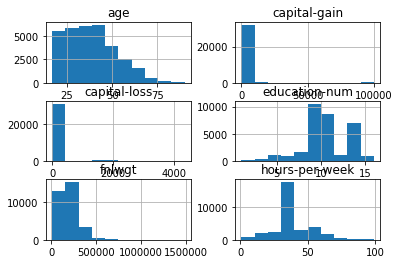

In [49]:
df_census = pd.read_csv('census_income_data.csv')
df_census.hist();

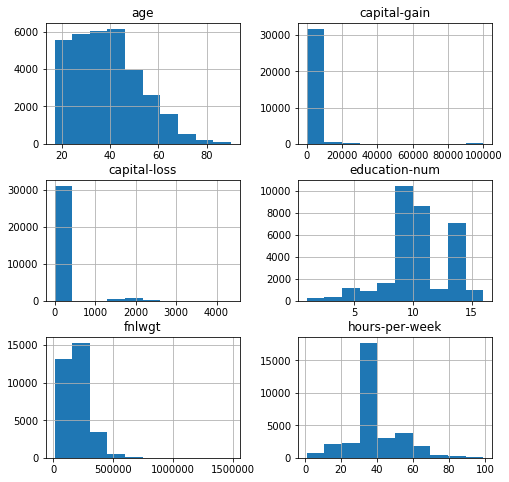

In [50]:
df_census.hist(figsize=(8,8)); # specify figure size and suprsess outputing text 

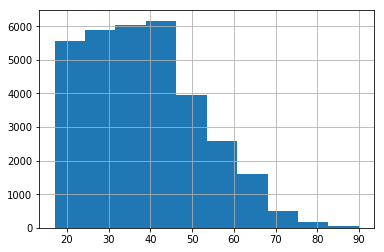

In [54]:
df_census['age'].hist();

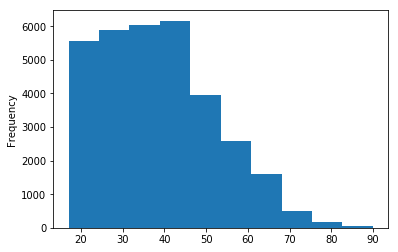

In [55]:
df_census['age'].plot(kind='hist');

Bar charts

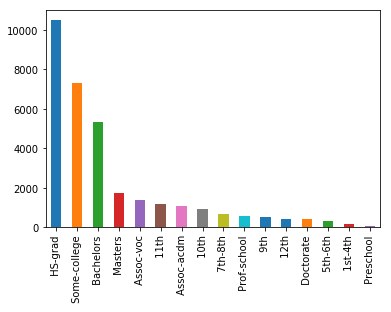

In [58]:
df_census['education'].value_counts().plot(kind='bar');

Pie charts

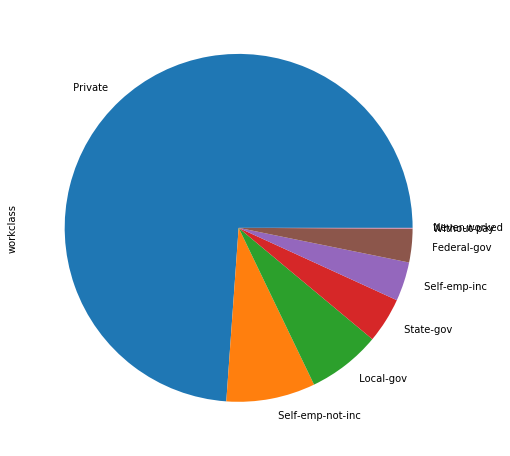

In [59]:
df_census['workclass'].value_counts().plot(kind='pie', figsize=(8, 8));

Relationships for all pairs and histograms for each variable

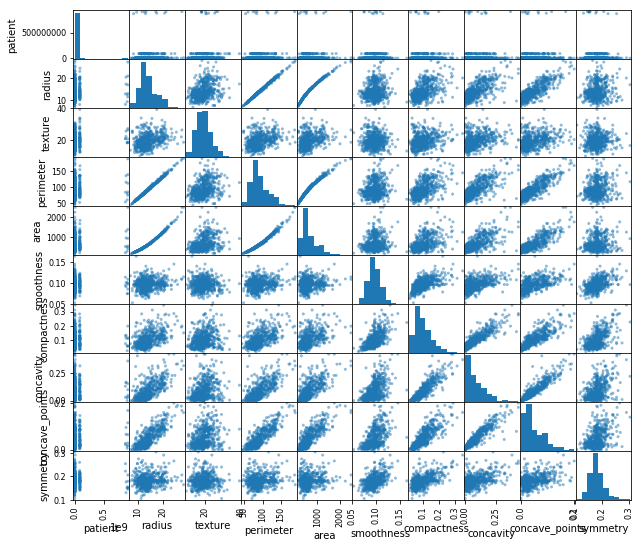

In [62]:
pd.plotting.scatter_matrix(df, figsize=(10,9));

Simple scatter plot for two variables:

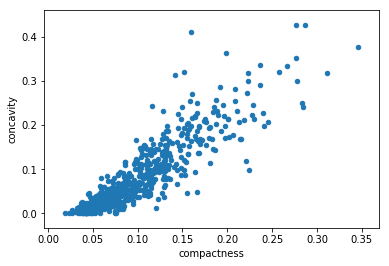

In [64]:
df.plot(x='compactness', y='concavity', kind='scatter');

Box plot

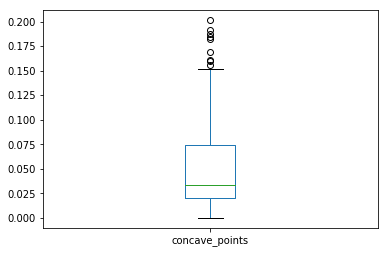

In [66]:
df['concave_points'].plot(kind='box');

### Data operations <a class="anchor" id="groupop"></a>

#### Group by operation can be perform for single or multiple columns:

In [69]:
df.groupby('diagnosis').mean()

patient     radius    texture   perimeter        area  \
diagnosis                                                               
B          2.673919e+07  12.144799  17.903685   78.066073  462.712429   
M          3.712319e+07  17.450524  21.590559  115.294667  976.582857   

           smoothness  compactness  concavity  concave_points  symmetry  
diagnosis                                                                
B            0.092516     0.080192   0.046045        0.025718  0.174683  
M            0.102132     0.145771   0.160959        0.088158  0.192163

In [73]:
df_census.groupby(['relationship','sex']).mean()

age         fnlwgt  education-num  \
relationship    sex                                                
 Husband         Female  34.000000  175878.000000       9.000000   
                 Male    43.819360  187075.711264      10.326562   
 Not-in-family   Female  40.154839  183652.905032      10.429419   
                 Male    36.763883  197673.713995      10.216027   
 Other-relative  Female  36.586047  192639.525581       9.041860   
                 Male    30.493648  214752.611615       8.588022   
 Own-child       Female  24.623163  185920.973719       9.684187   
                 Male    24.990790  198944.522140       9.328728   
 Unmarried       Female  40.671063  189864.346647       9.669555   
                 Male    39.030303  195364.280303       9.550505   
 Wife            Female  39.855683  181810.392720      10.459770   
                 Male    32.500000  212476.500000      13.000000   

                         capital-gain  capital-loss  hours-per-week  
relationship    sex                                                  
 Husband         Female      0.000000      0.000000       40.000000  
                 Male     1795.198302    124.170331       44.120452  
 Not-in-family   Female    562.282065     64.619355       38.366968  
                 Male      901.690745     84.812641       42.545147  
 Other-relative  Female    209.097674     64.476744       35.093023  
                 Male      334.611615     41.074410       38.499093  
 Own-child       Female    154.864143     42.782628       30.806682  
                 Male      156.284803     36.910733       35.227772  
 Unmarried       Female    340.381311     37.620950       38.249435  
                 Male      839.223485     54.345960       41.963384  
 Wife            Female   1661.911239    118.157088       36.844828  
                 Male        0.000000      0.000000       50.000000

#### Encoding continuous variables (pandas.cut(...))

Encode continuous variable according to the following rules:  
- High: Lowest 25% of pH values  
- Moderately High: 25% - 50% of pH values  
- Medium: 50% - 75% of pH values  
- Low: 75% - max pH value

In [77]:
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [82]:
bin_edges = [2.72 , 3.11, 3.21, 3.32, 4.01 ] 
bin_names = [ 'High', 'Moderately High', 'Medium', 'Low' ]
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
wine_df[['pH','acidity_levels']].head(6)

pH   acidity_levels
0  3.51              Low
1  3.20  Moderately High
2  3.26           Medium
3  3.16  Moderately High
4  3.51              Low
5  3.51              Low

#### Pandas query 
There are two ways to select data in Pandas:

In [83]:
df_m = df[df['diagnosis'] == 'M']
df_m = df.query('diagnosis == "M"')

In [86]:
df_a = df_census[df_census['income'] == ' >50K']
df_a = df_census.query('income == " >50K"')

In [87]:
df_h = df[df['radius'] > 13.375]
df_h = df.query('radius > 13.375')

In [97]:
r_median = wine_df['residual_sugar'].median()
low_sugar = wine_df.query('residual_sugar < {}'.format(r_median))
high_sugar = wine_df.query('residual_sugar >= {}'.format(r_median))

#### Drop columns

In [100]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                  columns=['A', 'B', 'C', 'D'])
df.drop(['B', 'C'], axis=1)

A   D
0  0   3
1  4   7
2  8  11

## Matplotlib

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

Plot bar with tick labels

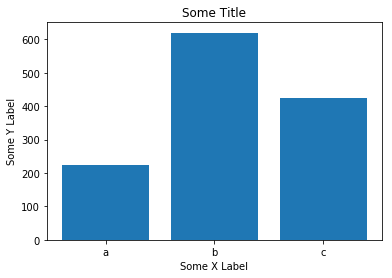

In [94]:
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);
plt.title('Some Title');
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label');

#### Line plot with nominal variables on x-axis: 

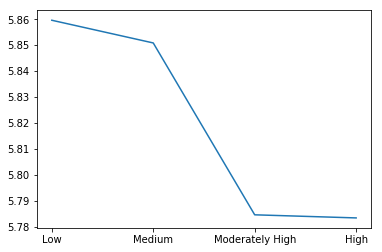

In [99]:
means = wine_df[['acidity_levels','quality']].groupby('acidity_levels').mean()
locations = [1,2,3,4]
heights = list(map(float,[means.loc['Low',:], means.loc['Medium',:], means.loc['Moderately High',:], means.loc['High',:]]))
labels = ['Low', 'Medium', 'Moderately High', 'High']
fig, ax = plt.subplots(1,1) 
ax.plot(locations, heights);
ax.set_xticks(locations);
ax.set_xticklabels(labels);

### Side by side bar plot

In [ ]:
import numpy as np
ind = np.arange(len(means_08))
width=0.35
locations = ind + width / 2  # xtick locations
red_bars = plt.bar(ind, means_08.cmb_mpg, width, color='r', alpha=0.7,label='2008')
blue_bars = plt.bar(ind + width, means_18.cmb_mpg, width, color='b', alpha=0.7, label='2018')

locations = ind + width / 2  # xtick locations
labels = list(meand_08.index)
plt.xticks(locations, labels, rotation=45)
plt.legend()